# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Deep Learning. Lesson 1</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Logistic Regression: http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/

Improving the way neural networks learn: http://neuralnetworksanddeeplearning.com/chap3.html

tensorflow.examples https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples

Deep Learning. An MIT Press book: http://www.deeplearningbook.org/

Deep Machine Learning—A New Frontier in Artificial Intelligence Research: http://web.eecs.utk.edu/~itamar/Papers/DML_Arel_2010.pdf

Code samples for "Neural Networks and Deep Learning" https://github.com/mnielsen/neural-networks-and-deep-learning

Representation Learning: A Review and New Perspectives http://www.cl.uni-heidelberg.de/courses/ws14/deepl/BengioETAL12.pdf

CS231n Convolutional Neural Networks for Visual Recognition http://cs231n.github.io/neural-networks-case-study/

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [1]:
import numpy as np
import scipy as sp

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt

import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##   &#x1F916; &nbsp; <span style="color:red">From Machine Learning to Deep Learning</span>

The **representation learning** is learning representations of the data that make it easier to extract useful information when building classifiers or other predictors.

In the case of probabilistic models, a good representation is often one that captures the posterior distribution of the underlying explanatory factors for the observed input. A good representation is also one that is useful as input to a supervised predictor.

### Deep Learning

Examples:

- Speech Recognition and Signal Processing
- Object Recognition
- Natural Language Processing
- Multi-Task and Transfer Learning, Domain Adaptation

A central cause of the diﬃculties with unsupervised learning is the high dimensionality of the random variables being modeled. 

The statistical challenge regards generalization: the number of conﬁgurations we may want to distinguish can grow exponentially with the number of dimensions of interest, and this quickly becomes much larger than the number of examples one can possibly have (or use with bounded computational resources)

The computational challenge associated with high-dimensional distributions arises because many algorithms for learning or using a trained model (especially those based on estimating an explicit probability function) involve intractable computations that grow exponentially with the number of dimensions.

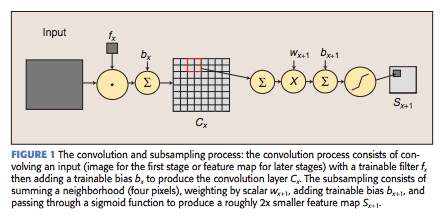

In [34]:
Image('dp1-2_01.png')

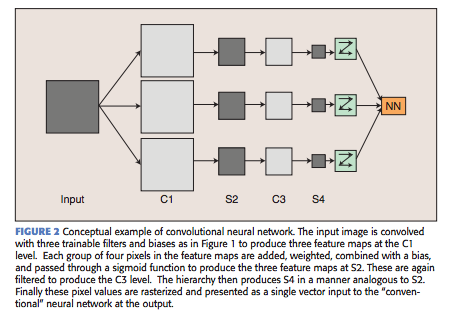

In [35]:
Image('dp1-2_02.png')

The general-purpose priors (not task-specific but useful for a learning machine to solve AI-tasks):

- Smoothness: assumes the function to be learned f is s.t. x ≈ y generally implies f(x) ≈ f(y).
- Multiple explanatory factors: the data generating distribution is generated by different underlying factors, and for the most part what one learns about one factor generalizes in many configurations of the other factors.
- A hierarchical organization of explanatory factors: the concepts that are useful for describing the world around us can be defined in terms of other concepts, in a hierarchy, with more abstract concepts higher in the hierarchy, defined in terms of less abstract ones.
- Semi-supervised learning: with inputs X and target Y to predict, a subset of the factors explaining X’s distribution explain much of Y, given X. Hence representations that are useful for P(X) tend to be useful when learning P(Y |X), allowing sharing of statistical strength between the unsupervised and supervised learning tasks.
- Shared factors across tasks: with many Y ’s of interest or many learning tasks in general, tasks (e.g., the corresponding P(Y |X,task)) are explained by factors that are shared with other tasks, allowing sharing of statistical strengths across tasks.
- Manifolds: probability mass concentrates near regions that have a much smaller dimensionality than the original space where the data lives.
- Natural clustering: different values of categorical variables such as object classes are associated with separate manifolds.
- Temporal and spatial coherence: different factors change at different temporal and spatial scales, and many categorical concepts of interest change slowly.
- Sparsity: for any given observation x, only a small fraction of the possible factors are relevant.
- Simplicity of Factor Dependencies: in good high-level representations, the factors are related to each other through simple, typically linear dependencies.

### Logistic Classifier

In [5]:
"""Quiz: Softmax
Note: Your softmax(x) function should return a NumPy array of the same shape as x.

For example, given a list or one-dimensional array (which is interpreted as a column vector representing a single sample), like:

scores = [1.0, 2.0, 3.0]
It should return a one-dimensional array of the same length, i.e. 3 elements:

print softmax(scores)
[ 0.09003057  0.24472847  0.66524096]
Given a 2-dimensional array where each column represents a sample, like:

scores = np.array([[1, 2, 3, 6],
                   [2, 4, 5, 6],
                   [3, 8, 7, 6]])
It should return a 2-dimensional array of the same shape, (3, 4):

[[ 0.09003057  0.00242826  0.01587624  0.33333333]
 [ 0.24472847  0.01794253  0.11731043  0.33333333]
 [ 0.66524096  0.97962921  0.86681333  0.33333333]]
The probabilities for each sample (column) must sum to 1. Feel free to test your function with these inputs.
"""
""" """

' '

In [6]:
np.exp(1)/(np.exp(1)+np.exp(2)+np.exp(3))

0.090030573170380462

In [7]:
scores1 = np.array([1.0, 2.0, 3.0])
scores2 = np.array([[1, 2, 3, 6],
                   [2, 4, 5, 6],
                   [3, 8, 7, 6]])

In [8]:
np.exp(scores1)

array([  2.71828183,   7.3890561 ,  20.08553692])

In [9]:
def sumexp(el):
    return np.exp(el)/np.sum(np.exp(el))

In [10]:
sumexp(scores1)

array([ 0.09003057,  0.24472847,  0.66524096])

In [11]:
a = np.shape(scores1)
b = scores2.shape
a

(3,)

In [12]:
c = scores1.ndim
d = scores2.ndim
c

1

In [13]:
sp.misc.logsumexp(scores1)

3.4076059644443806

In [14]:
np.logaddexp(scores2, scores2)

array([[ 1.69314718,  2.69314718,  3.69314718,  6.69314718],
       [ 2.69314718,  4.69314718,  5.69314718,  6.69314718],
       [ 3.69314718,  8.69314718,  7.69314718,  6.69314718]])

[ 0.8360188   0.11314284  0.05083836]


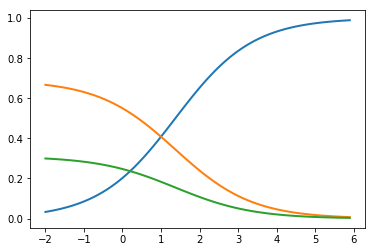

In [15]:
"""Softmax."""

scores = [3.0, 1.0, 0.2]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # TODO: Compute and return softmax(x)
    def sumexp(el):
        return np.exp(el)/np.sum(np.exp(el)) 
                    
    x = np.array(x)
    if x.ndim == 1:
        return sumexp(x)
    else:
        return np.apply_along_axis(sumexp, 0, x)


print(softmax(scores))

# Plot softmax curves

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

In [16]:
# Quiz: Softmax Quiz Part 2
softmax(scores1*10)

array([  2.06106005e-09,   4.53978686e-05,   9.99954600e-01])

In [17]:
# Quiz: Softmax Quiz Part 3
softmax(scores2/10)

array([[ 0.30060961,  0.24730918,  0.2693075 ,  0.33333333],
       [ 0.33222499,  0.30206411,  0.32893292,  0.33333333],
       [ 0.3671654 ,  0.45062671,  0.40175958,  0.33333333]])

In [18]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

In [19]:
softmax(scores1)

array([ 0.09003057,  0.24472847,  0.66524096])

In [20]:
softmax(scores2)

array([[ 0.09003057,  0.00242826,  0.01587624,  0.33333333],
       [ 0.24472847,  0.01794253,  0.11731043,  0.33333333],
       [ 0.66524096,  0.97962921,  0.86681333,  0.33333333]])

###  One-Hot Encoding

One hot encoding transforms categorical features to a format that works better with classification and regression algorithms. The goal is to generate one boolean column for each category: only one of these columns could take on the value 1 for each sample.

In [21]:
# Quiz: One-Hot Encoding

# a   1 0 0 0
# b   0 0 1 0
# c   0 0 0 1
# d   0 1 0 0

# a

In [22]:
enc = OneHotEncoder()

In [23]:
enc.fit([[0,1],[2,0],[3,1],[2,4],[3,5]])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [24]:
enc.n_values_

array([4, 6])

In [25]:
enc.feature_indices_

array([ 0,  4, 10])

In [26]:
enc.transform([[0, 5]]).toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [27]:
mlb = MultiLabelBinarizer()

In [28]:
mlb.fit_transform([set(['a', 'b']), set(['c']), set(['d', 'e'])])

array([[1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1]])

### Cross Entropy

In information theory, the cross entropy between two probability distributions ${\displaystyle p}$ and ${\displaystyle q}$ over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set, if a coding scheme is used that is optimized for an "unnatural" probability distribution ${\displaystyle q}$, rather than the "true" distribution ${\displaystyle p}$.

Cross-entropy minimization is frequently used in optimization and rare-event probability estimation.

Cross entropy can be used to define the loss function in machine learning and optimization. The true probability ${\displaystyle p_{i}}$ is the true label, and the given distribution ${\displaystyle q_{i}}$ is the predicted value of the current model.

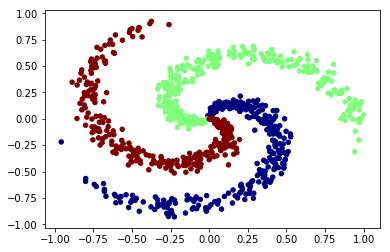

In [41]:
# Generate a classification dataset
N = 300 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.jet);

In [22]:
#Train a Linear Classifier http://cs231n.github.io/neural-networks-case-study/

# initialize parameters randomly
W = 0.005 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]

for i in range(200):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print ("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.097711
iteration 10: loss 0.906603
iteration 20: loss 0.835403
iteration 30: loss 0.803086
iteration 40: loss 0.786319
iteration 50: loss 0.776818
iteration 60: loss 0.771096
iteration 70: loss 0.767496
iteration 80: loss 0.765156
iteration 90: loss 0.763597
iteration 100: loss 0.762538
iteration 110: loss 0.761807
iteration 120: loss 0.761296
iteration 130: loss 0.760935
iteration 140: loss 0.760678
iteration 150: loss 0.760494
iteration 160: loss 0.760361
iteration 170: loss 0.760265
iteration 180: loss 0.760195
iteration 190: loss 0.760144


In [23]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


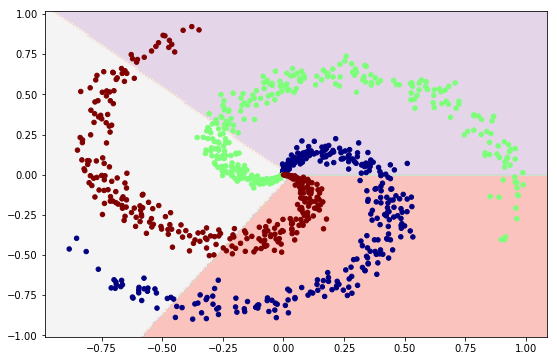

In [40]:
# plot the resulting classifier"
h = 0.01
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.11, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(9,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.jet)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max());

In [45]:
# Training a Neural Network
# initialize parameters randomly
h = 300 # size of hidden layer
W = 0.001 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.001 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]

for i in range(10000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098613
iteration 1000: loss 0.314449
iteration 2000: loss 0.260914
iteration 3000: loss 0.252629
iteration 4000: loss 0.247745
iteration 5000: loss 0.245189
iteration 6000: loss 0.244262
iteration 7000: loss 0.243899
iteration 8000: loss 0.243619
iteration 9000: loss 0.243512


In [47]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.0295601430963037, 1.0204398569036979)

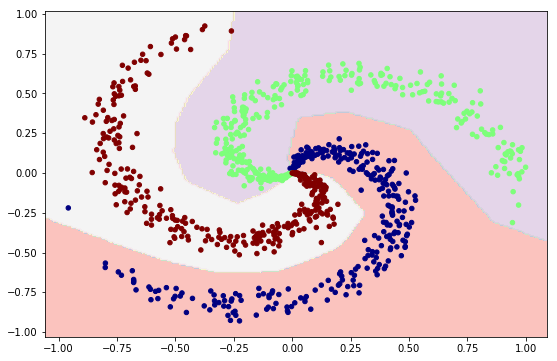

In [46]:
# plot the resulting classifier
h = 0.01
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(9,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.jet)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [29]:
# Quiz: Numerical Stability
np.power(10.0, 9) +  1000000 * np.power(10.0, -6) -  np.power(10.0, 9)

1.0

In [30]:
a1 = 1000000000
for i in range(1000000):
    a1 = a1 + 1e-6
print (a1 - 1000000000)

0.95367431640625


In [31]:
a2 = 1000000000
for i in range(1):
    a2 = a2 + 1e-6
print (a2 - 1000000000)

9.5367431640625e-07


In [32]:
# Quiz: Validation Set Size
3000*(0.81-0.8)

30.00000000000003

##   &#x1F916; &nbsp; <span style="color:red">Assignment1: notMNIST</span>

###  Deep Learning Example (tensorflow.examples)

In [5]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./notMNIST_large.tar.gz
Found and verified ./notMNIST_small.tar.gz


In [11]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.


Exception: Expected 10 folders, one per class. Found 11 instead.

In [39]:
# Problem 1
Image("notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png")

In [44]:
Image("notMNIST_large/E/a2FkZW4udHRm.png")

In [ ]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

In [46]:
# Problem 2

In [ ]:
# Problem 3

def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

In [ ]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [ ]:
# Problem 4
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [ ]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

In [ ]:
# Problem 5

In [ ]:
# problem 6